In [20]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, cluster, datasets, preprocessing, decomposition

In [21]:
# Importing the dataset

dataset = datasets.load_iris()
print(dir(dataset))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [22]:
# Creating the dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.drop(['sepal width (cm)', 'petal width (cm)'], inplace = True, axis = 1)
df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


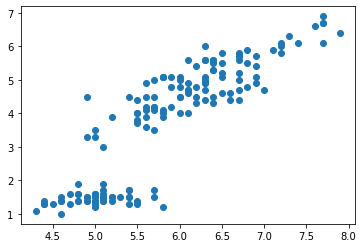

In [23]:
# Plotting the data in a scatter plot

plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.show()

In [24]:
# Scaling the features

scaler = preprocessing.MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df.head()

,sepal length (cm),petal length (cm)
0,0.222222,0.067797
1,0.166667,0.067797
2,0.111111,0.050847
3,0.083333,0.084746
4,0.194444,0.067797


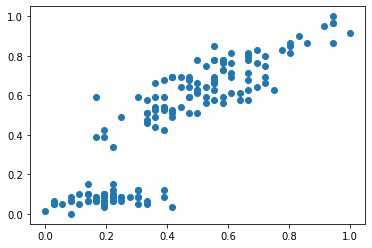

In [25]:
# Plotting the data in a scatter plot after scaling the features

plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.show()

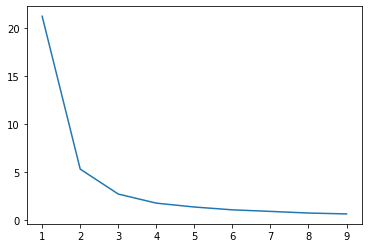

In [28]:
# Determining the correct number of clusters using elbow plot

sse = []

for i in range(1, 10):
    model = cluster.KMeans(n_clusters = i)
    model.fit(df)
    sse.append(model.inertia_)
    
plt.plot(range(1, 10), sse)
plt.show()

In [30]:
# Training the model and grouping data into clusters

model = cluster.KMeans(n_clusters = 2)

label = model.fit_predict(df)
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [31]:
df['label'] = label
df.head()

,sepal length (cm),petal length (cm),label
0,0.222222,0.067797,1
1,0.166667,0.067797,1
2,0.111111,0.050847,1
3,0.083333,0.084746,1
4,0.194444,0.067797,1


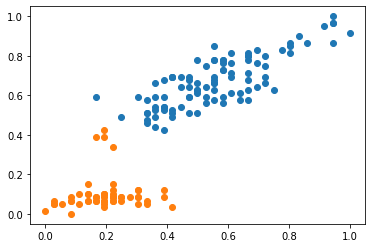

In [34]:
# Visualizing the clusters

df0 = df[df['label'] == 0]
df1 = df[df['label'] == 1]

plt.scatter(df0['sepal length (cm)'], df0['petal length (cm)'])
plt.scatter(df1['sepal length (cm)'], df1['petal length (cm)'])
plt.show()